# Lab 11 – TensorFlow/Keras

DUE: April 2, 2024 (Tues)  
Pair Programming: Optional, but highly encouraged  
Name(s): Katy Martinson and Sam Baldwin  
Class: CSCI 349 - Intro to Data Mining  
Section: 01   
Semester: Spring 2024  
Instructors: Brian King, Joshua Stough 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation
from keras.utils import model_to_dot
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier


2024-04-02 22:41:25.286498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.10.0


1. [P] Copy over your code from the previous lab that read in and pre-processed the iris dataset from seaborn.
You should have a pandas dataframe that contains four numeric variables and one categorical variable
representing the target class. You should have one dataframe X and a dataframe y representing the target class. Do not split your data into training and testing data yet.

In [3]:
df_iris = sns.load_dataset('iris')
df_iris.species = pd.Categorical(df_iris.species, ordered=False)
print(df_iris.info())
print(df_iris.describe())
print(df_iris.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000    

In [4]:
X = df_iris.iloc[:,:4]
y = pd.DataFrame(df_iris.species)

print(X.columns)
print(y.columns)
print(X.shape)
print(y.shape)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['species'], dtype='object')
(150, 4)
(150, 1)


In [5]:
X = X.apply(zscore)
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


2. [P] Shuffle your data in your data frames. This will be important for later exercises. Read about the
shuffle() function in sklearn.utils. Import it, and use it to shuffle your X and y data frames. Use
random_state=0. Remember – it returns the shuffled data! So, be sure to reassign X and y.

In [6]:
X = shuffle(X, random_state=0)
y = shuffle(y, random_state=0)

3. [P] Use train_test_split to split your data, but this time, let's use an even smaller split, using a 50/50
split, initializing with a random state of 0. (Why? This is a relatively simple dataset. Let's make the problem a
bit more challenging by introducing a smaller training data size.)
Completing this will result in X_train, X_test, y_train and y_test data frames, both with 75
instances.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, test_size=0.50, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 4)
(75, 1)
(75, 4)
(75, 1)


4. [M] How many inputs will your network need to have?

4 inputs are required

5. [M] Consider the outputs required for a neural network. Remember that the iris dataset is a multi-class
dataset. It has to predict three different, categorical values. How do you represent a multi-class target variable
in a model like a neural net? For the iris data, what does the final layer of your neural net structure need to
look like?

You can represent a multi-class dataset using one-hot encoding. This creates a binary matrix where the number of columns is the number of classes and then, using SoftMax, we can find out the probability distribution over the classes. 

6. [P] Write the code to convert the iris target variables (i.e. y_train and y_test) to a set of binarized
variables derived from the target class variable (why? Hopefully you figured out why based on your previous
answer!)

With iris, this means that the "species" variable should be converted to a data frame (or numpy array)
of three variables, one representing each species. (HINT: as usual, there are many ways to do this. I like pandas
get_dummies() or scikit-learn's OneHotEncoder.) 

In [8]:
y_test_bin = pd.get_dummies(y_test)
y_train_bin = pd.get_dummies(y_train)
y_train_bin.head(10)

,species_setosa,species_versicolor,species_virginica
107,False,False,True
47,True,False,False
129,False,False,True
40,True,False,False
48,True,False,False
75,False,True,False
42,True,False,False
73,False,True,False
53,False,True,False
14,True,False,False


7. [P] Create your input node using Input. Usually, these are simply called inputs. When you create your
model, you will need a distinct reference to the input later, so clearly name this. Remember how many inputs
your network will have. Specify this here using the shape= parameter.

In [9]:
inputs = Input(shape=(4,))
inputs.shape

TensorShape([None, 4])

8. [P] Add the hidden layer(s), and specify the input as you move along that each layer should receive. We will
keep it simple: we will just have one hidden layer, which is a Dense object. Specify the number of units in the
layer (e.g. 9-12 is a good start for these simple data.) Specify an activation function of your choosing. Most
basic nets use a 'sigmoid' or 'tanh' activation, though deep learning emphasizes 'relu'. (Be sure you
understand why. It's explained in the second video on neural nets posted!) Any of the above activations are
fine.

In [10]:
layer = Dense(12, activation='sigmoid')(inputs)

2024-04-02 22:42:06.102292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


9) [P] Add one more Dense layer representing the output layer. Be sure to specify the correct number of
outputs. Use a 'softmax' activation here. Be sure to connect the previous layer.

In [11]:
outputs = Dense(3, activation='softmax')(layer)

10) [P] Create an instance of Model. Specify the inputs, the outputs, and name the model
"simple_iris_model". Then, report a summary of your model using the summary() function. If you
did everything correctly, your model should look as follows (though your layer ids may be different):

In [12]:
simple_iris_model = Model(inputs=inputs, outputs=outputs)
simple_iris_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


11) [P] OK. Now compile your model. Look at the documentation for the compile() method. You'll need to
specify the following parameters:
a) Choose an optimizer – This is a GREATLY HEATED TOPIC on deep learning and ANN blogs. The facts:
Stochastic Gradient Descent (SGD) is the quintessential standard. It is the basis of neural net learning. It
is mathematically sound; however, it can suffer from the worst computational performance (i.e. timing to
convergence.) All enhancements and newer methods are based on SGD. For SGD, an appropriate
selection of a momentum parameter makes a huge difference, and papers have come out demonstrating
that SGD + a good momentum parameter are as effective as the most hyped optimization techniques, if
you can identify good parameters. (For example: https://arxiv.org/abs/1705.08292 ) Selecting good
learning rates, momentum and other parameters is not easy. Theoretically, there are an infinite number
of combinations you could choose. So, several other methods have come out to help address the
challenges of selecting good parameters. Adam is most commonly used optimizer in practice for deep
learning. So, use optimizer='sgd' to start, but then go back and set it to optimizer = 'adam'.
b) Choose the loss function – This is the function that gives you the error that is backpropagated. Use
loss='categorical_crossentropy' for this problem.
c) Choose the performance metrics – Typically, you will stick with metrics=['accuracy'] here. You
can do far more with your predictions later.

In [13]:
simple_iris_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

12) [P] OK, your structure is set. Now you need to train the model. Look at the documentation for the fit()
method. Use fit to train your model with X_train and your binarized y_train data. There are many
additional parameters available that basically control how you perform weight updates. This is where,
depending on your data size and your selection of parameters, you could be waiting a while. This is a SIMPLE
dataset, and should take no more than a 5-10 seconds to get good results. 

In [14]:
history = simple_iris_model.fit(x=X_train, y=y_train_bin, epochs=100, batch_size=1, verbose=0, validation_data=(X_test, y_test_bin))

13) [P] It's important to understand your accuracy and loss rates as your model proceeds through training.
Visualize the loss on training and test data. Look at the code presented here:
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/. You may adapt
it, or make it more fancy if you choose to do so. Pay attention to the section of code that shows Training
history visualization. If you did everything correctly, you should show two graphs, one for model loss, and one
for model accuracy. 

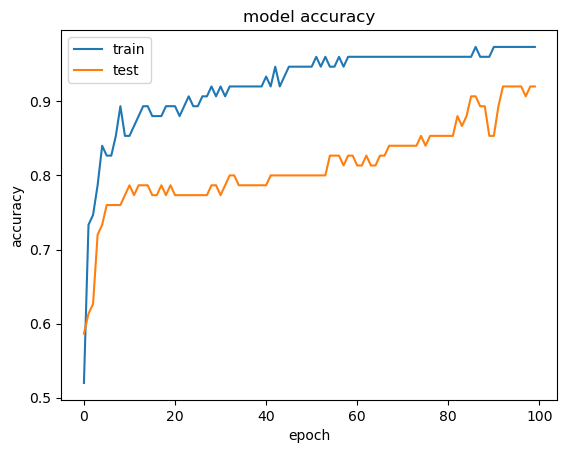

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

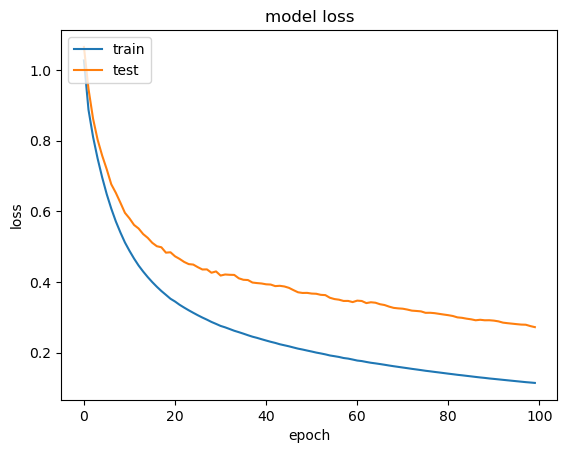

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

14) [P] – THIS STEP IS OPTIONAL! Look at the example flow of a keras project as presented in
https://keras.io/guides/functional_api/. Notice the steps to plot the model as a graph. You can generate a nice
visualization of the model. You don't need to do it for this step, but might be good to try out and know how to
do for your future. 

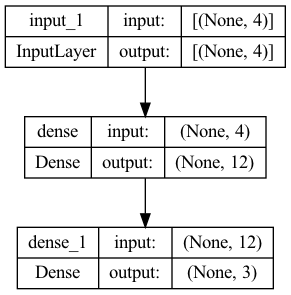

In [17]:
keras.utils.plot_model(simple_iris_model, "my_first_model_with_shape_info.png", show_shapes=True)

15) [P] Try to change some parameters with the model. However, instead of copying and pasting each individual
line you wrote above, follow the approach of creating the entire structure in a single notebook cell. This will
get you started:

In [18]:
inputs = Input(shape=(4,))
layer = Dense(4, activation='relu')(inputs)
outputs = Dense(3,activation="softmax")(layer)
model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model_2")

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history_2 = model.fit(x=X_train, y=y_train_bin, epochs=150, batch_size=1, verbose=0, validation_data=(X_test, y_test_bin))

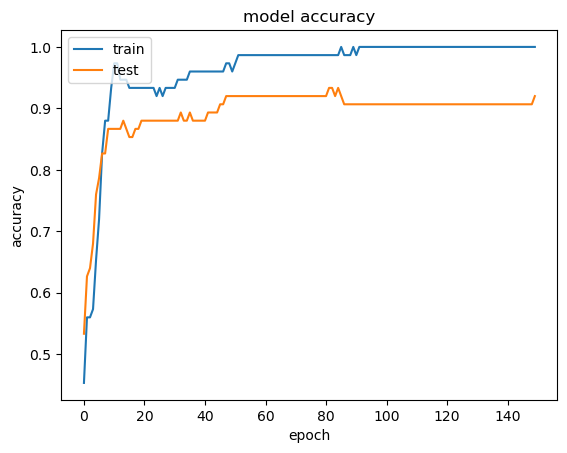

In [21]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

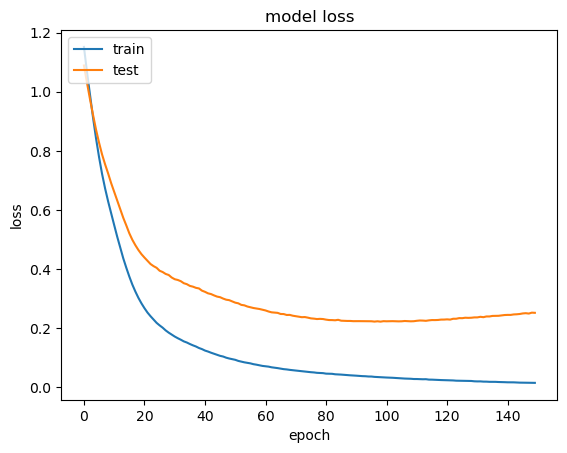

In [22]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Using 150 epochs clearly shows that both the testing and training data begin to stabilize at ~80. Using relu for the hidden layer and adam as the optimizer seemed to improve the accuracy of the model.

16. OK, one more time. This time, copy the same model, but use an SGD optimizer. Of course, you may have
already chosen this by specifying the optimizer='sgd' parameter when you compiled your model. This
time, you will instantiate your optimizer. \
However, remember that we're using Keras embedded inside of TensorFlow: \
from tensorflow.keras.optimizers import SGD\
Copy one of your models above. (Remember, if you keep using the same model instance, you are continually
improving the weights, and thus not evaluating your new model properly! When you experiment with new
models, you need to instantiate a new model, or figure out how to reset your weights to random initial
values. For now, it's just easy enough to reinstantiate a new model.) \
Now, instantiate SGD. Look at the documentation, and choose a different learning rate (lr) and a momentum
value of some value between 0.5-0.9. Compile and fit your model. Regenerate your accuracy and loss plots.
Compare and contrast your findings.

In [23]:
inputs = Input(shape=(4,))
layer = Dense(12, activation='sigmoid')(inputs)
outputs = Dense(3, activation='softmax')(layer)
sgd_iris_model = Model(inputs=inputs, outputs=outputs, name='sgd_iris_model')
sgd_iris_model.summary()

Model: "sgd_iris_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 12)                60        
                                                                 
 dense_5 (Dense)             (None, 3)                 39        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [24]:
sgd_optimizer = SGD(learning_rate=0.05, momentum=0.5, decay=0.0, nesterov=False)
sgd_iris_model.compile(optimizer= sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history_3 = sgd_iris_model.fit(x=X_train, y=y_train_bin, epochs=150, batch_size=1, verbose=0, validation_data=(X_test, y_test_bin))

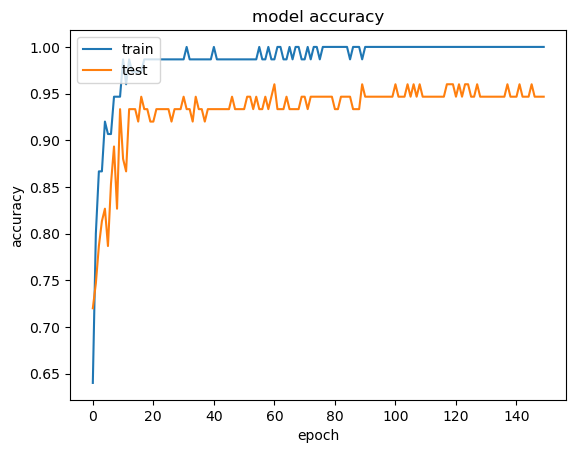

In [26]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

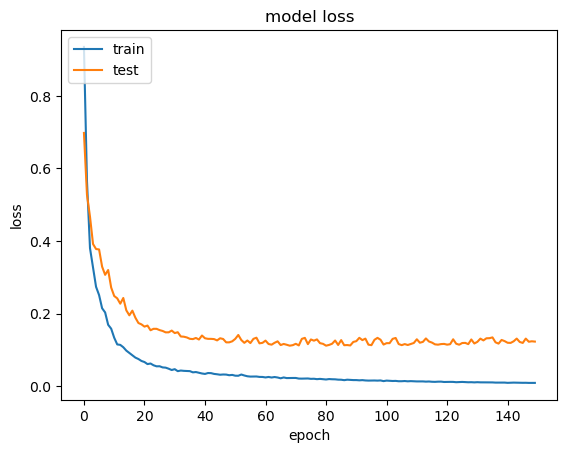

In [27]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compare and Contrast: With a higher momentum, we see faster movement towards the extremes for loss and accuracy, but higher variability once reaching those extremes. It takes fewer epochs for the statistics to stabilize, generally finishing between 20 and 40 epochs but once that stabilization is reached, there is a level of variability in the model loss especially not seen without the higher momentum. 


17. Remember, this is a classification problem. Use your model to predict the classes for the test data (using the
function predict on the model object itself) and store the results as y_pred. (NOTE: the model is part of
the history object. So, use history.model.predict. 


In [28]:
y_pred = sgd_iris_model.predict(X_test)
y_pred

3/3 [==============================] - 0s 2ms/step


array([[5.95366811e-10, 3.74065858e-05, 9.99962568e-01],
       [9.73376970e-08, 3.46996658e-03, 9.96529996e-01],
       [8.37874177e-06, 4.99945097e-02, 9.49997067e-01],
       [9.98633206e-01, 1.36676326e-03, 2.08666105e-11],
       [1.26728124e-03, 9.79763448e-01, 1.89693402e-02],
       [9.96954441e-01, 3.04553355e-03, 3.52576440e-11],
       [2.41232296e-08, 4.36732022e-04, 9.99563277e-01],
       [5.84602633e-09, 2.32043240e-04, 9.99767959e-01],
       [1.63314712e-06, 1.28949778e-02, 9.87103403e-01],
       [7.38390721e-03, 9.92578208e-01, 3.78930963e-05],
       [9.95602131e-01, 4.39785328e-03, 5.10801158e-11],
       [3.21120330e-09, 8.25388706e-05, 9.99917507e-01],
       [9.99374330e-01, 6.25681714e-04, 1.57601068e-11],
       [1.00924217e-06, 2.76524089e-02, 9.72346604e-01],
       [2.31083599e-04, 9.99099374e-01, 6.69577683e-04],
       [2.19832009e-06, 5.72994091e-02, 9.42698359e-01],
       [9.98632014e-01, 1.36801426e-03, 2.06243477e-11],
       [2.14903508e-07, 9.75630

18. Notice the structure of y_pred. Remember, softmax generates probabilistic output. So, turn this into a new
variable called y_pred_class that predicts the actual class label. (HINT: argmax is your friend!)

In [29]:
y_train_bin

,species_setosa,species_versicolor,species_virginica
107,False,False,True
47,True,False,False
129,False,False,True
40,True,False,False
48,True,False,False
...,...,...,...
71,False,True,False
143,False,False,True
125,False,False,True
65,False,True,False


In [30]:
print(y_pred.shape)
y_pred_class = pd.Series(np.argmax(y_pred, axis=1))
y_pred_class = y_pred_class.replace(0, 'setosa')
y_pred_class = y_pred_class.replace(1, 'versicolor')
y_pred_class = y_pred_class.replace(2, 'virginica')

(75, 3)


19. Finally, using your code from the lab on classification, output the confusion_matrix and the
classification_report (from scikit-learn's metric package) to print out the complete performance
results. 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       1.00      0.82      0.90        22
   virginica       0.88      1.00      0.94        30

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



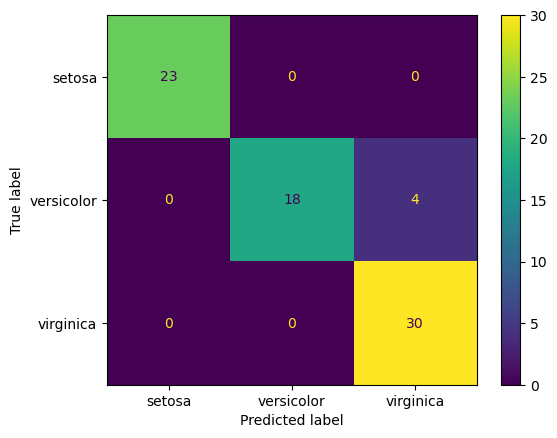

In [31]:
print(classification_report(y_test.species, y_pred_class))
ConfusionMatrixDisplay(confusion_matrix(y_test.species, y_pred_class), display_labels=["setosa", "versicolor", "virginica"]).plot()

20. Import the following class into your code:\
from scikeras.wrappers import KerasClassifier\
Then write a function called create_keras_model(). Copy all of your code that creates the Model
instance and adds the layers into this function.
For example, my function looks as follows:

In [32]:
def create_keras_model(): 
    inputs = Input(shape=(4,))
    layer = Dense(12, activation='sigmoid')(inputs)
    outputs = Dense(3, activation="softmax")(layer)
    model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model_3")
    return model

sgd = SGD(learning_rate = 0.02, momentum = 0.6)

clf = KerasClassifier(model=create_keras_model, optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"], verbose=1, epochs=100, batch_size=1)

21. At this point, you now have a classifier model that behaves like any other scikit-learn classifier! Cool, right? \
So, using the clf classifier above, use it just like you would any other classifier. Run the fit method on your
classifier, just like you did in lab10. Use X_train and the one hot encoded y_train data. \
NOTE: You might be wondering how to get access to the actual learning curve, i.e. the History object. You can!
Look at the history_ attribute of clf after fitting your data. It contains the actual data you want to plot.
Finally, use clf.predict() to generate class predictions on X_test. Store the results in y_pred. just
like you would with scikit-learn. \
y_pred = clf.predict(X_test) \
Remember you'll need to convert the predictions back to a single value using argmax.

In [33]:
clf.fit(X_train,y_train_bin,verbose=0)

KerasClassifier(
	model=<function create_keras_model at 0x149eb8af0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x149e50cd0>
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=1
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

In [34]:
y_pred = clf.predict(X_test)
y_pred_class = pd.Series(np.argmax(y_pred, axis=1))
y_pred_class = y_pred_class.replace(0, 'setosa')
y_pred_class = y_pred_class.replace(1, 'versicolor')
y_pred_class = y_pred_class.replace(2, 'virginica')

75/75 [==============================] - 0s 733us/step


22. Use the predictions to generate a confusion matrix.Be sure to pay attention to whether the predictions
are class labels or probabilities of each class. If they are probabilities, then you need to use the argmax()
method to get the class label.

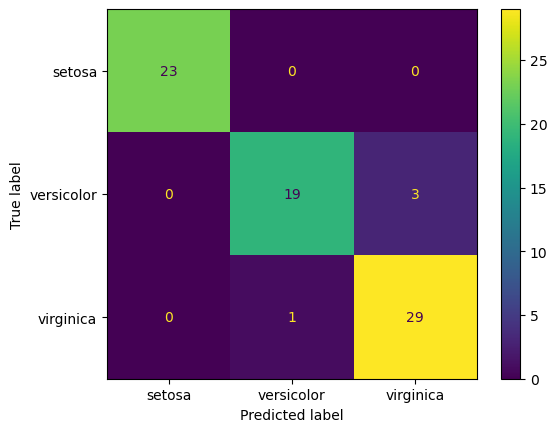

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test.species, y_pred_class), display_labels=["setosa", "versicolor", "virginica"]).plot()

23. Generate a performance report with the classification_report function

In [36]:
print(classification_report(y_test.species, y_pred_class))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      0.86      0.90        22
   virginica       0.91      0.97      0.94        30

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



24. Now, harness the power of wrapping this class. Use your code from lab10 that performed a full cross
validation. For sake of your time, you may set K to 5. Also, you will likely want to disable verbose mode for
this, otherwise you'll have a LOT of output. AND, because deep learning models can take a while to train each
model, it is a good idea to generate some output in your loop to show that the cross validation is progressing.


In [37]:
kf = KFold(n_splits = 5, random_state = 100, shuffle = True)
print(kf)

KFold(n_splits=5, random_state=100, shuffle=True)


In [38]:
df_results = pd.DataFrame(columns=["true", "pred"])
clf = KerasClassifier(model=create_keras_model, optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"], verbose=0, epochs=100, batch_size=1)
true = []
pred = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Starting Fold #{i+1}")
    start = time.time()
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(X_train, y_train)

    y_pred_test = clf.predict(X_test)

    true = np.append(true, y_test)
    pred = np.append(pred, y_pred_test)
    end = time.time()
    print(f"Fold #{i+1} complete, time = {round(end-start, 3)} sec")

df_results.true = true
df_results.pred = pred

Starting Fold #1


/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fold #1 complete, time = 7.582 sec
Starting Fold #2


/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fold #2 complete, time = 8.732 sec
Starting Fold #3


/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fold #3 complete, time = 8.717 sec
Starting Fold #4


/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fold #4 complete, time = 7.643 sec
Starting Fold #5


/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fold #5 complete, time = 8.065 sec


25. Generate a full confusion matrix and final classification report based on your 5-fold cross validation of the
keras model.

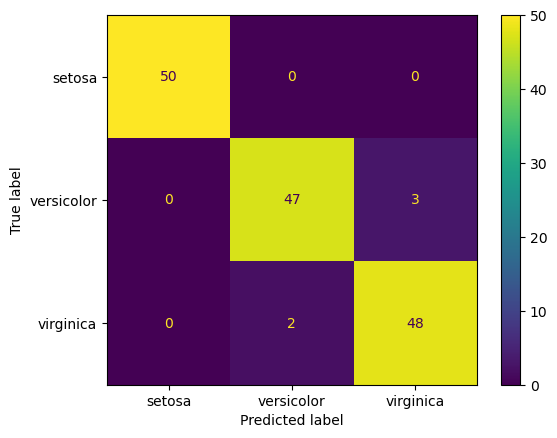

In [113]:
ConfusionMatrixDisplay(confusion_matrix(df_results.true, df_results.pred), display_labels=["setosa", "versicolor", "virginica"]).plot()

In [112]:
print(classification_report(df_results.true, df_results.pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

